## Introduction 

This dataset serves as a great opportunity to do some analysis on the distribution of events accross time and location, which plays an important role in occassions such as examining the effectiveness of some policies and spotting and responding to the most urgent parts of an strategy.
<br>
<br>
I want to do some quick exploratory analysis and raise some findings using viaualization.

## Setup

In [15]:
### load required packages 
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [16]:
### load the dataset 
df = pd.read_csv('D:/Dataset/Side_project_Speed_camera_violations/cameras.csv', encoding='utf-8')

## overview 
print('The shape:')
print(df.shape)

print('\nThe information:')
print(df.info())

# the number and percentage of NAs in each column
print('\nNAs:')
print(np.sum(df.isnull()))
print(np.sum(df.isnull())/len(df)*100) # in percentage

# the start and the end of the date
print('\nStart and End:')
print(df['DATE'][[0, df.shape[0]-1]])

# the number of different cameras
print('\nDifferent cameras:')
print(df['CAMERA ID'].value_counts().head())
print(len(df['CAMERA ID'].value_counts()))

The shape:
(93924, 7)

The information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93924 entries, 0 to 93923
Data columns (total 7 columns):
DATE          93924 non-null object
CAMERA ID     93924 non-null object
ADDRESS       93924 non-null object
VIOLATIONS    93924 non-null int64
LATITUDE      90242 non-null float64
LONGITUDE     90242 non-null float64
LOCATION      90242 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ MB
None

NAs:
DATE             0
CAMERA ID        0
ADDRESS          0
VIOLATIONS       0
LATITUDE      3682
LONGITUDE     3682
LOCATION      3682
dtype: int64
DATE          0.000000
CAMERA ID     0.000000
ADDRESS       0.000000
VIOLATIONS    0.000000
LATITUDE      3.920191
LONGITUDE     3.920191
LOCATION      3.920191
dtype: float64

Start and End:
0        07/01/2014
93923    12/31/2016
Name: DATE, dtype: object

Different cameras:
CHI019    914
CHI009    914
CHI080    913
CHI005    912
CHI010    912
Name: CAMERA ID, dtype: int64
15

From the NAs outcomes, the NAs are only in location-related columns, and they account for certain percentage, which needs to be investigated later.

## EDA

In [17]:
### DATE

## Convert the DATE column into datetime object 
from datetime import datetime

df['DATE'] = df['DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
print(df['DATE'].head()) # for checking 

## Get the months and weekdays
def week_day(val):
    week_days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return week_days_list[val]

df['Month'] = df['DATE'].map(lambda x: x.month)
df['Weekday'] = df['DATE'].map(lambda x: week_day(x.weekday()))

## If every day is in the data?
print((df['DATE'][len(df['DATE'])-1] - df['DATE'][0]).days+1)
print(len(df['DATE'].value_counts()))
print('Yes! Each day is in this dataset.')

0   2014-07-01
1   2014-07-01
2   2014-07-01
3   2014-07-01
4   2014-07-01
Name: DATE, dtype: datetime64[ns]
915
915
Yes! Each day is in this dataset.


#### Are the NAs in location-related data are concentrated on certain dates-related data?

Number of days having NAs:
915
The highest:
2015-02-01 00:00:00


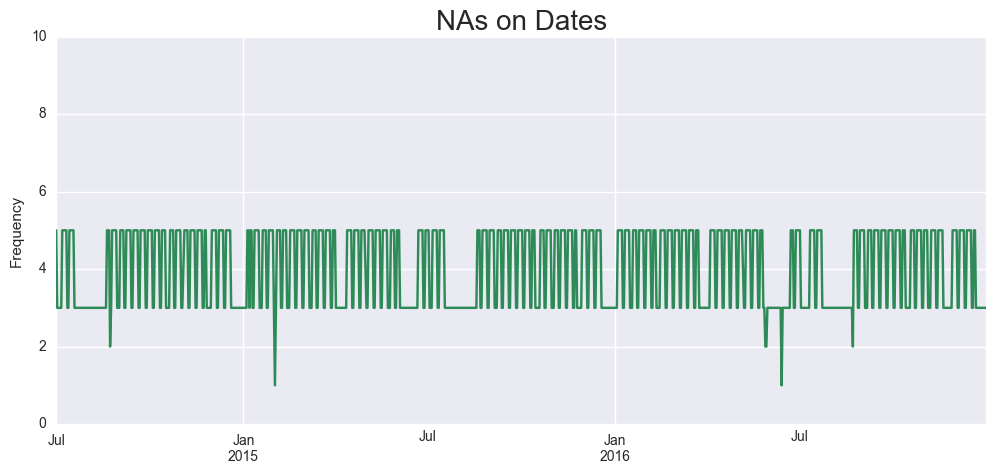

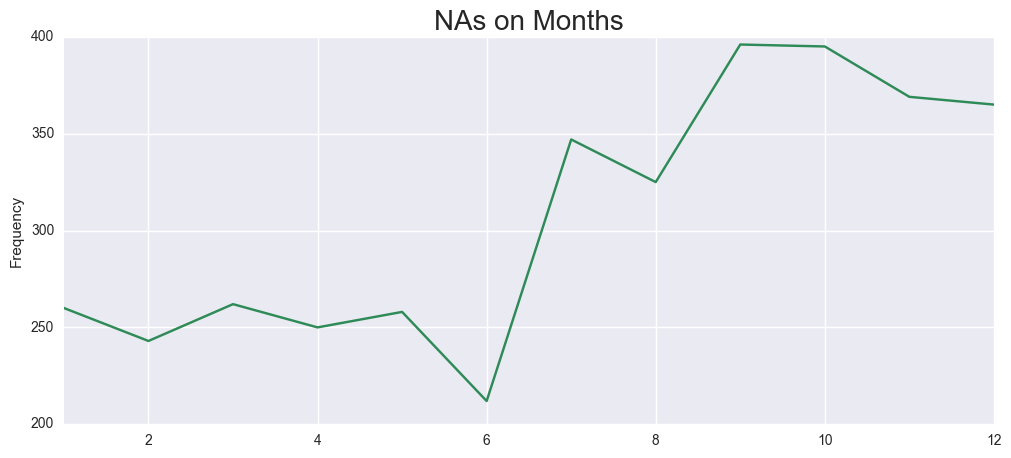

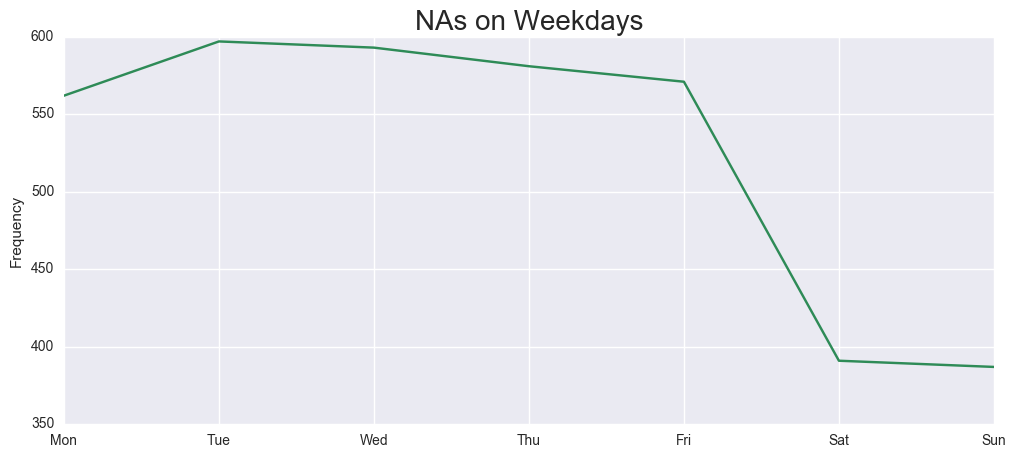

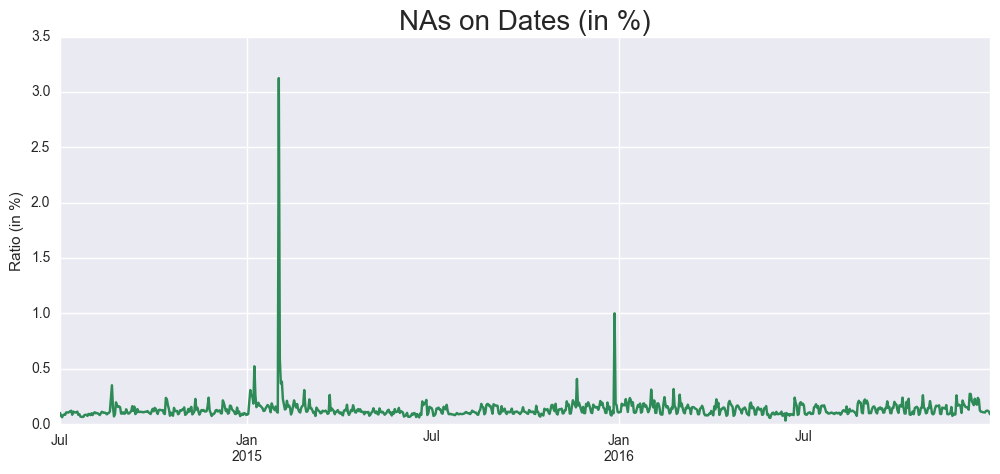

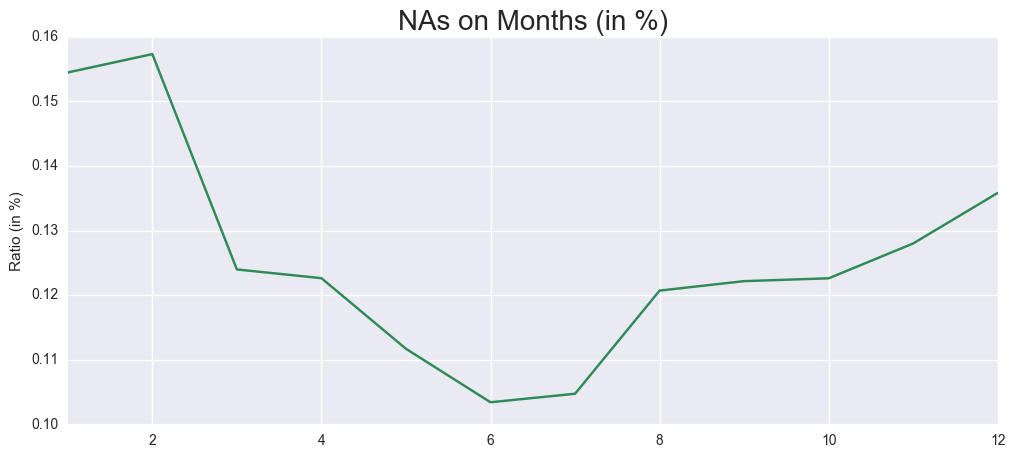

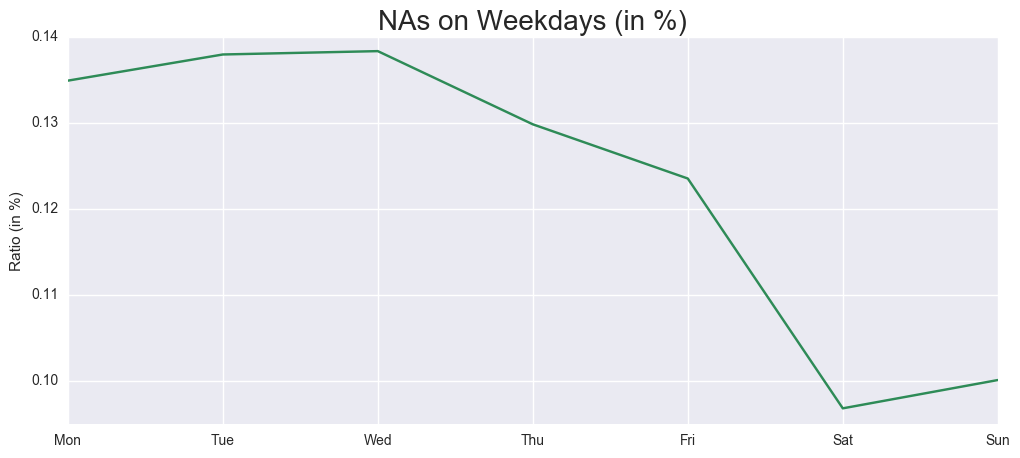

In [18]:
## if the NAs are conventrated on certain dates?
ind_location_nas = np.argwhere(df['LOCATION'].isnull()).ravel()

# for dates
print('Number of days having NAs:')
print(len(df['DATE'][ind_location_nas].value_counts()))
fig, axes = plt.subplots(figsize=[12, 5])
df['DATE'][ind_location_nas].value_counts().sort_index().plot(color='#2E8B57')
axes.set_ylim([0, 10])
axes.set_title('NAs on Dates', fontsize=20)
axes.set_ylabel('Frequency')

# for months
fig, axes = plt.subplots(figsize=[12, 5])
df['Month'][ind_location_nas].value_counts().sort_index().plot(color='#2E8B57')
axes.set_title('NAs on Months', fontsize=20)
axes.set_ylabel('Frequency')

# for weekdays
weekday_count = dict(df['Weekday'][ind_location_nas].value_counts())
weekday_count_list = []
week_days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for day in week_days_list:
    weekday_count_list.append(weekday_count[day])

fig, axes = plt.subplots(figsize=[12, 5])
plt.plot(weekday_count_list, color='#2E8B57')
axes.set_xticks(np.arange(len(week_days_list)))
axes.set_xticklabels(week_days_list)
axes.set_title('NAs on Weekdays', fontsize=20)
axes.set_ylabel('Frequency')

## Check the ratio

# for dates
date_group = df.groupby(['DATE'])
fig, axes = plt.subplots(figsize=[12, 5])
(df['DATE'][ind_location_nas].value_counts().sort_index()/date_group['VIOLATIONS'].sum()*100).sort_index().plot(color='#2E8B57')
axes.set_title('NAs on Dates (in %)', fontsize=20)
axes.set_ylabel('Ratio (in %)')
print('The highest:')
print(np.argmax((df['DATE'][ind_location_nas].value_counts().sort_index()/date_group['VIOLATIONS'].sum()*100)))

# for months
month_group = df.groupby(['Month'])
fig, axes = plt.subplots(figsize=[12, 5])
(df['Month'][ind_location_nas].value_counts().sort_index()/month_group['VIOLATIONS'].sum()*100).sort_index().plot(color='#2E8B57')
axes.set_title('NAs on Months (in %)', fontsize=20)
axes.set_ylabel('Ratio (in %)')

# for weekdays
week_group = df.groupby(['Weekday'])
weekday_violations = dict(week_group['VIOLATIONS'].sum())

weekday_violatioin_ratio_list = []
for day in week_days_list:
    weekday_violatioin_ratio_list.append(weekday_count[day]/weekday_violations[day]*100)

fig, axes = plt.subplots(figsize=[12, 5])
plt.plot(weekday_violatioin_ratio_list, color='#2E8B57')
axes.set_xticks(np.arange(len(week_days_list)))
axes.set_xticklabels(week_days_list)
axes.set_title('NAs on Weekdays (in %)', fontsize=20)
axes.set_ylabel('Ratio (in %)')    

The NAs on location-related data may have some trends on "months" and "weekdays". Moreover, the 2015/02/01 has a particularly high ratio on NAs. It needs further study.

### The number of different cameras and different addresses don't match?

In [19]:
### CAMERA

## How many different cameras are there?
print('Number of different cameras:')
print(len(df['CAMERA ID'].value_counts()))
print()
print('Number of differenct addresses:')
print(len(df['ADDRESS'].value_counts()))

print()
print('Some cameras have been moved?')

Number of different cameras:
150

Number of differenct addresses:
151

Some cameras have been moved?


In [20]:
## check the un-matched cameras and addresses
camera_group = df.groupby(['CAMERA ID'])
print(camera_group['ADDRESS'].unique().head())

print()
print('The camera that has multiple addresses:')
for camera in list(dict(camera_group['ADDRESS'].unique()).keys()):
    if len(dict(camera_group['ADDRESS'].unique())[camera]) > 1:
        print(camera)
print(dict(camera_group['ADDRESS'].unique())['CHI126'])

print()
print(df.ix[df['CAMERA ID'] == 'CHI126', ['DATE', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'LOCATION']].head())
print(df.ix[df['CAMERA ID'] == 'CHI126', ['DATE', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'LOCATION']].tail())

CAMERA ID
CHI003    [4124 W FOSTER AVE]
CHI004       [5120 N PULASKI]
CHI005      [2080 W PERSHING]
CHI007       [3843 S WESTERN]
CHI008       [3655 W JACKSON]
Name: ADDRESS, dtype: object

The camera that has multiple addresses:
CHI126
['319 E ILLINOIS ST' '324 E ILLINOIS ST']

          DATE            ADDRESS  LATITUDE  LONGITUDE  \
275 2014-07-03  319 E ILLINOIS ST  41.89091 -87.619348   
403 2014-07-05  319 E ILLINOIS ST  41.89091 -87.619348   
655 2014-07-08  319 E ILLINOIS ST  41.89091 -87.619348   
752 2014-07-09  319 E ILLINOIS ST  41.89091 -87.619348   
933 2014-07-11  319 E ILLINOIS ST  41.89091 -87.619348   

                      LOCATION  
275  (41.8909101, -87.6193475)  
403  (41.8909101, -87.6193475)  
655  (41.8909101, -87.6193475)  
752  (41.8909101, -87.6193475)  
933  (41.8909101, -87.6193475)  
            DATE            ADDRESS   LATITUDE  LONGITUDE  \
93026 2016-12-21  324 E ILLINOIS ST  41.891134 -87.619089   
93156 2016-12-22  324 E ILLINOIS ST  41.891134 -87.

Apparently, the camera 'CHI126' has been moved to another place nearby.

#### Do NAs on location-related data concentrate on certain cameras?

CHI068    912
CHI010    912
CHI069    912
CHI065    473
CHI064    473
Name: CAMERA ID, dtype: int64
The NAs concentrate on the above five cameras


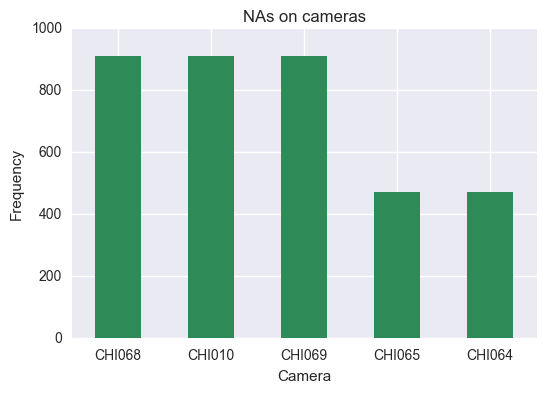

In [21]:
ind_location_nas = np.argwhere(df['LOCATION'].isnull()).ravel()

print(df['CAMERA ID'][ind_location_nas].value_counts())
print('The NAs concentrate on the above five cameras')

df['CAMERA ID'][ind_location_nas].value_counts().plot(kind='bar', color='#2E8B57', edgecolor='none', rot=0)
plt.title('NAs on cameras')
plt.ylabel('Frequency')
plt.xlabel('Camera')

#### Violations on different time

Outlier:
2015-02-01 00:00:00
32


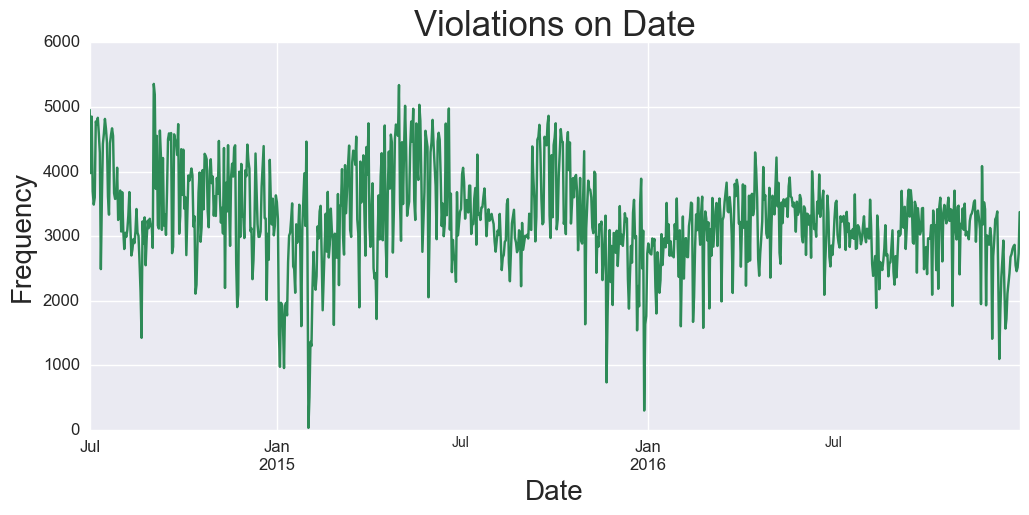

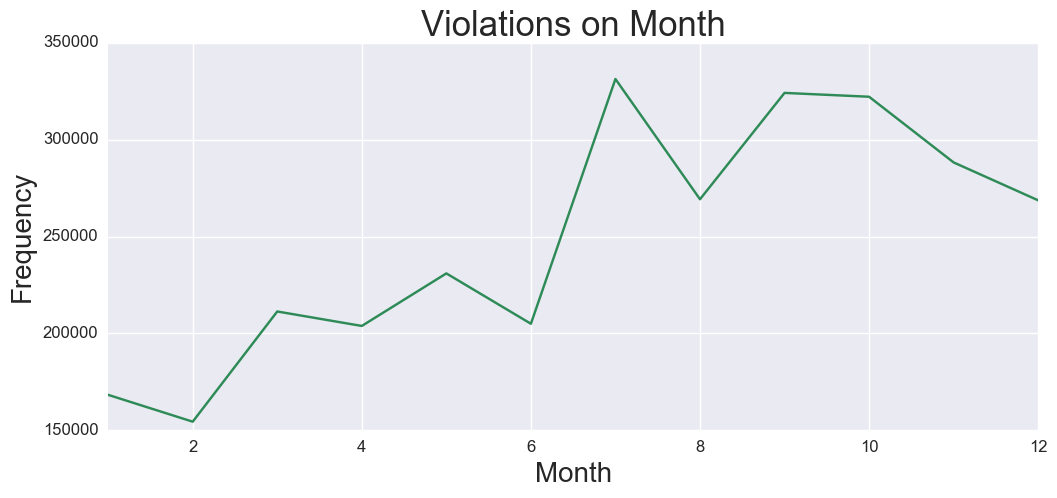

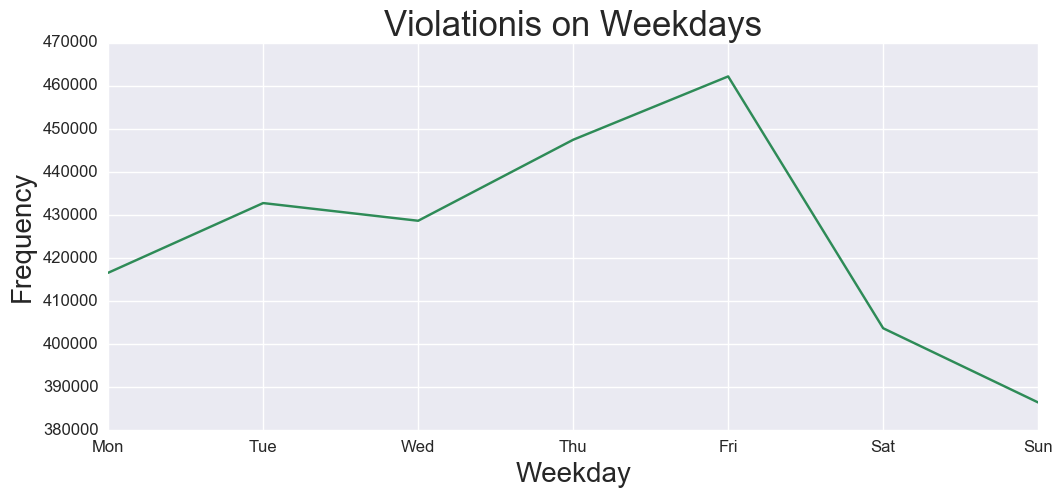

In [22]:
## for dates
date_group = df.groupby(['DATE'])
fig, axes = plt.subplots(figsize=[12, 5])
date_group['VIOLATIONS'].sum().sort_index().plot(color='#2E8B57')
axes.set_title('Violations on Date', fontsize=25)
axes.tick_params(labelsize='large')
axes.set_ylabel('Frequency', fontsize=20)
axes.set_xlabel('Date', fontsize=20)

# There seems to be an outlier on 2015/02/01
print('Outlier:')
print(np.argmin(date_group['VIOLATIONS'].sum()))
print(date_group['VIOLATIONS'].sum().min())

## for months
month_group = df.groupby(['Month'])
fig, axes = plt.subplots(figsize=[12, 5])
month_group['VIOLATIONS'].sum().sort_index().plot(color='#2E8B57')
axes.set_title('Violations on Month', fontsize=25)
axes.tick_params(labelsize='large')
axes.set_ylabel('Frequency', fontsize=20)
axes.set_xlabel('Month', fontsize=20)

## for weekdays
week_group = df.groupby(['Weekday'])
weekday_violations = dict(week_group['VIOLATIONS'].sum())

weekday_violatioin_list = []
for day in week_days_list:
    weekday_violatioin_list.append(weekday_violations[day])

fig, axes = plt.subplots(figsize=[12, 5])
plt.plot(weekday_violatioin_list, color='#2E8B57')
axes.set_xticks(np.arange(len(week_days_list)))
axes.set_xticklabels(week_days_list)
axes.set_title('Violationis on Weekdays', fontsize=25)
axes.tick_params(labelsize='large')
axes.set_ylabel('Frequency', fontsize=20)
axes.set_xlabel('Weekday', fontsize=20)

1. There are some trends from the above graphs, the violations grow from February to June, and they peak, become flat and then 
start to fall from October.

2. During Monday to Friday, the violations keep growin; however the violations start to decrease from Friday to Sunday.

3. Over the recent years, the violations captured seem to be lower.

4. There seems to be an outlier for the counts of violations on 2015/2/1, which is very low.

#### Fill the NAs in location-related data with correct values

In [23]:
## Does each camera have the same records?
print(df['CAMERA ID'].value_counts().head())
print(df['CAMERA ID'].value_counts().tail())
print('The differences of records of each camera are large')

print()
print('The number of records for the camera with NAs in location-related data:')
print(df['CAMERA ID'].value_counts()[list(df['CAMERA ID'][ind_location_nas].value_counts().index)])

CHI019    914
CHI009    914
CHI080    913
CHI005    912
CHI010    912
Name: CAMERA ID, dtype: int64
CHI111    273
CHI026    257
CHI167    222
CHI166    192
CHI131    123
Name: CAMERA ID, dtype: int64
The differences of records of each camera are large

The number of records for the camera with NAs in location-related data:
CHI068    912
CHI010    912
CHI069    912
CHI065    473
CHI064    473
Name: CAMERA ID, dtype: int64


From the table above, I can conclude that except those cameras with NAs, the other cameras don't have NAs.
Therefore, there is no need to fill the NAs since the problems are totally related to certain cameras. And thus the
relationship of NAs and date-related data is of no use

#### Adjust the locations to the same values for camera CHI126

In [24]:
## Drop the NAs
df_nna = df.dropna(how='any')
df_nna.index = range(len(df_nna))
print(df_nna.shape)
print(len(df_nna['CAMERA ID'].value_counts())) # 5 cameras are excluded

(90242, 9)
145


In [25]:
## Use the new location for CHI126 to replace the original one
new_location = list(df_nna.ix[len(df_nna)-1, ['LATITUDE', 'LONGITUDE', 'LOCATION']].values)
print('New location for CHI126:')
print(new_location)

for ind, col in enumerate(['LATITUDE', 'LONGITUDE', 'LOCATION']):
    df_nna.ix[df_nna['CAMERA ID'] == 'CHI126', col] = df_nna.ix[df_nna['CAMERA ID'] == 'CHI126', col].apply(lambda x: new_location[ind])

print()
print('Checking:')
print(df_nna.ix[df_nna['CAMERA ID'] == 'CHI126', ['LATITUDE', 'LONGITUDE', 'LOCATION']].head())

print()
print('Number of different locations:')
print(len(df_nna['LOCATION'].value_counts()))

print()
print('There are same locations?') 
print(df_nna['LOCATION'].value_counts().head()) # (41.742993, -87.6611378)
print(df_nna.ix[df_nna['LOCATION'] == '(41.742993, -87.6611378)', :]['CAMERA ID'].value_counts()) # CHI 126 and CHI 170
#print(df_nna.ix[df_nna['CAMERA ID'].isin(['CHI126', 'CHI170']), :])
print(df_nna.ix[[264, 89408], :]) # They have different addresses; however the locations are very near

New location for CHI126:
[41.742992999999998, -87.661137800000006, '(41.742993, -87.6611378)']

Checking:
      LATITUDE  LONGITUDE                  LOCATION
264  41.742993 -87.661138  (41.742993, -87.6611378)
386  41.742993 -87.661138  (41.742993, -87.6611378)
625  41.742993 -87.661138  (41.742993, -87.6611378)
717  41.742993 -87.661138  (41.742993, -87.6611378)
888  41.742993 -87.661138  (41.742993, -87.6611378)

Number of different locations:
144

There are same locations?
(41.742993, -87.6611378)     1513
(41.8809382, -87.7178984)     914
(41.866364, -87.699143)       914
(41.9540927, -87.6965965)     913
(41.8231888, -87.6773488)     912
Name: LOCATION, dtype: int64
CHI126    767
CHI170    746
Name: CAMERA ID, dtype: int64
            DATE CAMERA ID            ADDRESS  VIOLATIONS   LATITUDE  \
264   2014-07-03    CHI126  319 E ILLINOIS ST           1  41.742993   
89408 2016-12-21    CHI170     1507 W 83rd ST           1  41.742993   

       LONGITUDE                  LOCATION  M

### Where are they? Visualize the distribution of cameras

In [26]:
## Get the data for sum of violations and location

# use the 2016 data
camera_loc_group = df_nna.ix[df['DATE'] > datetime(2015, 12, 31), :].groupby(['CAMERA ID', 'LATITUDE', 'LONGITUDE'])
camera_loc_vio = dict(camera_loc_group['VIOLATIONS'].sum())

from collections import defaultdict
temp_tab = defaultdict(list)
for key in list(camera_loc_vio.keys()):
    temp_tab[key[0]].append(camera_loc_vio[key])
    temp_tab[key[0]].extend(key[1:])
    
vio_loc_df = pd.DataFrame(temp_tab).transpose()
vio_loc_df.columns = ['VIOLATIONS', 'lat', 'lon']
print(vio_loc_df.head())

        VIOLATIONS        lat        lon
CHI003     43387.0  41.975605 -87.731670
CHI004     11645.0  41.974333 -87.728347
CHI005      3405.0  41.823189 -87.677349
CHI007     23381.0  41.823564 -87.684721
CHI008      6900.0  41.877071 -87.718168


In [27]:
## Visualization

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoieG5pcGVyIiwiYSI6ImNqMDR6cXR0aDBoNm4ycWxzcTF2Z3ZxbGsifQ.dAlvq0ZttViD4l3HRbqeYw'

data = Data([
    Scattermapbox(
        lat=list(vio_loc_df['lat'].values),
        lon=list(vio_loc_df['lon'].values),
        mode='markers',
        marker=Marker(
            size=8,
            color='#000000',
            opacity=1
        ),
        text=list(vio_loc_df.index),
    ),
        Scattermapbox(
        lat=list(vio_loc_df['lat'].values),
        lon=list(vio_loc_df['lon'].values),
        mode='markers',
        marker=Marker(
            size=5,
            color='#FFFF33',
            opacity=0.7
        ),
        text=list(vio_loc_df.index),hoverinfo='skip'
    )])

layout = Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=1000,
    title='The Distribution of Cameras',
    hovermode='closest',
    margin=go.Margin(
        l=50,
        r=10,
        b=50,
        t=100,
        pad=2
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=np.mean(vio_loc_df['lat']),
            lon=np.mean(vio_loc_df['lon'])
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Camera_distribution', validate=False)

From the figure above, I can conclude that the distribution is more dense in the northern part of Chicage.

## Where to fix? Visualize the most-captured areas (in 2016)

In [28]:
## Visualization

# scale the violations to 0 to 1
vio_loc_df['VIOLATIONS_scl'] = vio_loc_df['VIOLATIONS'].apply(lambda x: (x-vio_loc_df['VIOLATIONS'].min())/(vio_loc_df['VIOLATIONS'].max()-vio_loc_df['VIOLATIONS'].min()))

mapbox_access_token = 'pk.eyJ1IjoieG5pcGVyIiwiYSI6ImNqMDR6cXR0aDBoNm4ycWxzcTF2Z3ZxbGsifQ.dAlvq0ZttViD4l3HRbqeYw'

scl = [[0, 'rgb(2, 223, 132)'], [1, 'rgb(0, 0, 0)']]

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoieG5pcGVyIiwiYSI6ImNqMDR6cXR0aDBoNm4ycWxzcTF2Z3ZxbGsifQ.dAlvq0ZttViD4l3HRbqeYw'

data = Data([    

    Scattermapbox(
        lat=list(vio_loc_df['lat'].values),
        lon=list(vio_loc_df['lon'].values),
        mode='markers',
        marker=Marker(
            size=15,
            color=list(vio_loc_df['VIOLATIONS'].values),
            opacity=0.9,
                        colorscale=scl,
        cmin=0,
        cmax=vio_loc_df['VIOLATIONS'].values.max(),
        colorbar=dict()
        ),
        text=list(vio_loc_df.index),
    ),])

layout = Layout(
    showlegend=False,
    autosize=False,
    width=800,
    height=1000,
    title='The Distribution of Number of Violatioins Captured (in 2016)',
    hovermode='closest',
    margin=go.Margin(
        l=50,
        r=10,
        b=50,
        t=100,
        pad=2
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=np.mean(vio_loc_df['lat']),
            lon=np.mean(vio_loc_df['lon'])
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='Violation_distribution', validate=False)


From the above figure, I find that the dots around northern part are a little darker than their southern counterparts, this would result from some reasons, such as the drivers in the northern part really drive faster and are more likely to break the speed limit or it is simply because the traffic is more in the northern part. 
<br>
<br>
I think I would need more data to validate the phenomenon, such as the funtionality of each section, the traffics and so on. They would certainly make the analysis better!